In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Check interparticle distance in Cairo and Shakti lattices

    In this script, I will analyze the interparticle distance in the fisrt frame of the simulations for the Cairo lattice and shakti lattice. In particular, I want to check if those interparticle distances are the same. 

In [2]:
data_directory_shakti = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-12.0"
data_directory_cairo = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.2"

In [82]:
radius = 5

### Open .lammpstrj  file shakti

In [86]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory_shakti,
                                         "ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp0.lammpstrj"),
                                            output = ["x","y","z","mux","muy","muz"])    
bnd = load_obj.get_bounds(slice(0,None,200000))
trj = load_obj.read_trj(slice(0,None,200000))

### Check particle distances

In [95]:
particles_shakti = trj.query('type == 1')
traps_shakti = trj.query('type == 2 or type == 3')

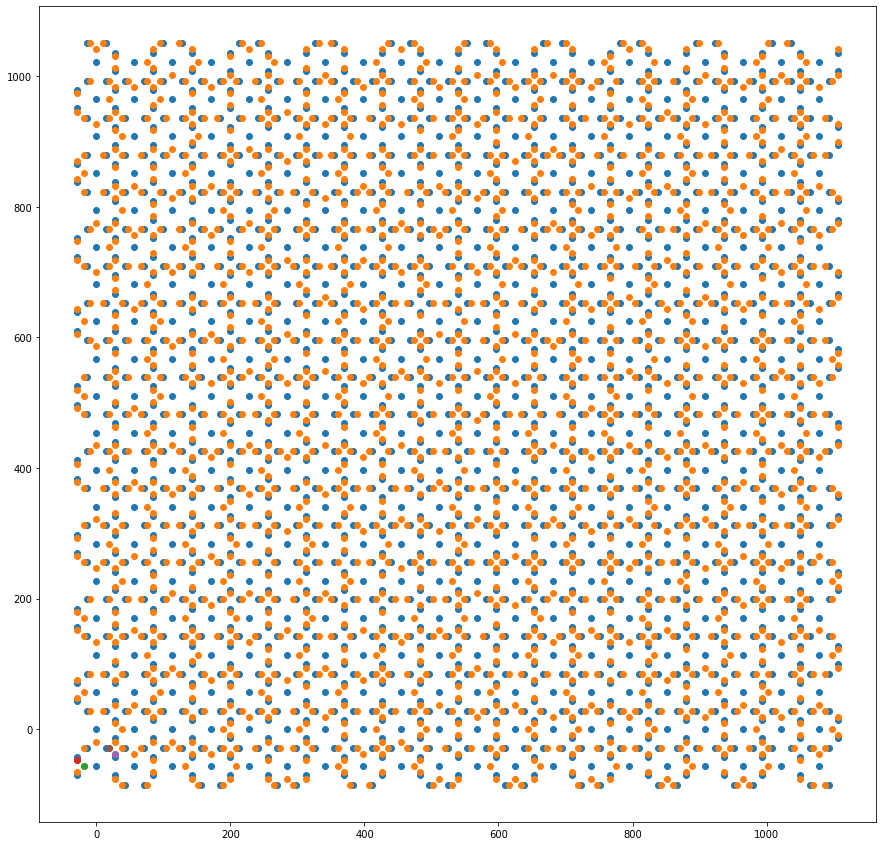

In [110]:
plt.figure(figsize = (15,15))
plt.plot(traps_shakti.x, traps_shakti.y,'o')
plt.plot(particles_shakti.x, particles_shakti.y,'o')


plt.plot(particles_shakti.iloc[10].x, particles_shakti.iloc[10].y, 'o')
plt.plot(particles_shakti.iloc[11].x, particles_shakti.iloc[11].y, 'o')

plt.plot(particles_shakti.iloc[13].x, particles_shakti.iloc[13].y, 'o')
i = 4
plt.plot(particles_shakti.iloc[i].x, particles_shakti.iloc[i].y, 'o')

In [90]:
def distance(particle1, particle2):
    
    dist = np.sqrt((particle1.x-particle2.x)**2+(particle1.y-particle2.y)**2)
    
    return dist

In [91]:
distance(particles_shakti.iloc[10],particles_shakti.iloc[11])-2*radius

3.0000153718484963

In [108]:
distance(particles_shakti.iloc[13],particles_shakti.iloc[4])-2*radius

3.000018069246801

### Open .lammpstrj  file cairo

In [57]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory_cairo,
                                         "ACI_CairoLattice_25mT-2500s_FreeBound_l10_exp0.lammpstrj"),
                                            output = ["x","y","z","mux","muy","muz"])    
bnd = load_obj.get_bounds(slice(0,None,200000))
trj = load_obj.read_trj(slice(0,None,200000))
col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])

In [64]:
particles_cairo = trj.query('type == 1')

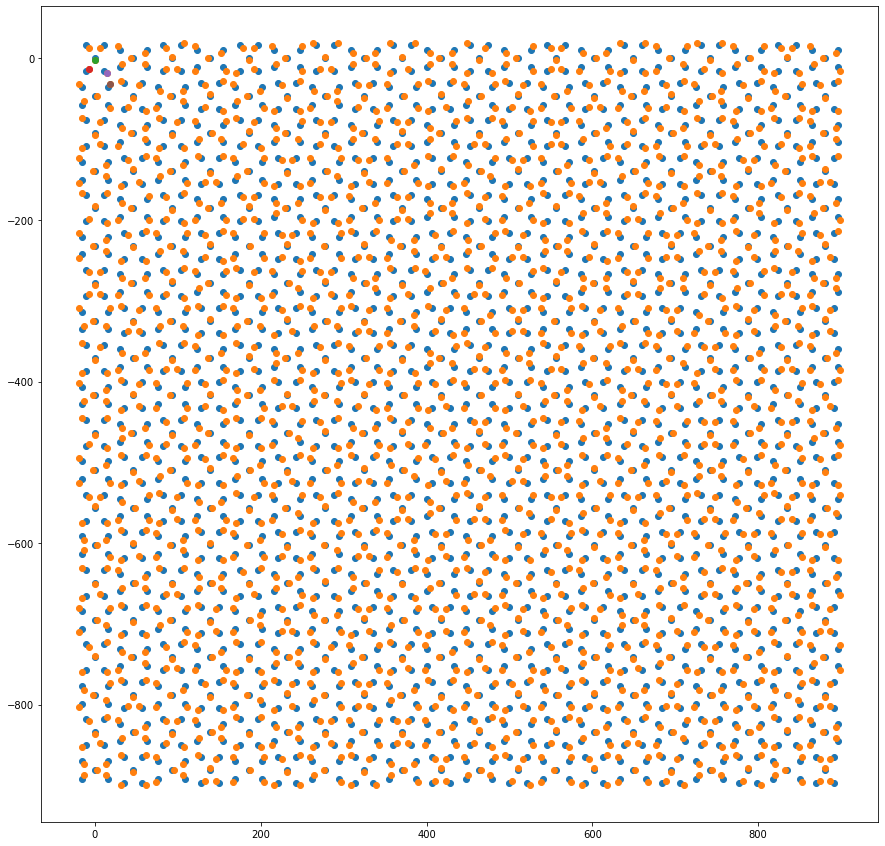

In [111]:
plt.figure(figsize = (15,15))
plt.plot(col_trj.x, col_trj.y,'o')
plt.plot(particles_cairo.x, particles_cairo.y,'o')

plt.plot(particles_cairo.iloc[0].x, particles_cairo.iloc[0].y,'o')
plt.plot(particles_cairo.iloc[4].x, particles_cairo.iloc[4].y,'o')

plt.plot(particles_cairo.iloc[3].x, particles_cairo.iloc[3].y,'o')
i = 11
plt.plot(particles_cairo.iloc[i].x, particles_cairo.iloc[i].y,'o')

In [72]:
distance(particles_cairo.iloc[0],particles_cairo.iloc[4])-2*radius

3.0392501352417884

In [81]:
distance(particles_cairo.iloc[3],particles_cairo.iloc[11])-2*radius

3.047693456521481

# Seems that interparticles distances is near 3 um in both cases